<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab11_estadistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pylab as plt

[Números aleatorios](https://es.wikipedia.org/wiki/Generador_de_n%C3%BAmeros_aleatorios)
\begin{equation}
x_{n+1} = (ax + c)\% m
\end{equation}







In [ ]:
a = 3  #Constante multiplicativa
x = 2 #Semilla
c = 5 #Constante lineal
m = 16 #Modulo

def aleatorios(x,a,c):
  return (a*x+c)%m


x_=np.zeros(100)
for i in range(0, 100):
  x_[i] = aleatorios(x, a, c)
  x=x_[i]
print(x_)

[11.  6.  7. 10.  3. 14. 15.  2. 11.  6.  7. 10.  3. 14. 15.  2. 11.  6.
  7. 10.  3. 14. 15.  2. 11.  6.  7. 10.  3. 14. 15.  2. 11.  6.  7. 10.
  3. 14. 15.  2. 11.  6.  7. 10.  3. 14. 15.  2. 11.  6.  7. 10.  3. 14.
 15.  2. 11.  6.  7. 10.  3. 14. 15.  2. 11.  6.  7. 10.  3. 14. 15.  2.
 11.  6.  7. 10.  3. 14. 15.  2. 11.  6.  7. 10.  3. 14. 15.  2. 11.  6.
  7. 10.  3. 14. 15.  2. 11.  6.  7. 10.]


Consideremos al círculo unitario inscrito en el cuadrado de lado 2 centrado en el origen. Dado que el cociente de sus áreas es
$\pi/4$ , el valor de $\pi$ puede aproximarse usando Montecarlo de acuerdo al siguiente método:3


1.  Dibuja un círculo unitario, y al cuadrado de lado 2 que lo inscribe.

2. Lanza un número n de puntos aleatorios uniformes dentro del cuadrado.

2. Cuenta el número de puntos dentro del círculo, i.e. puntos cuya distancia al origen es menor que 1.

3. El cociente de los puntos dentro del círculo dividido entre n es un estimado de, $\pi$

4. Multiplica el resultado por 4 para estimar $\pi$.
En este cálculo se tienen que hacer dos consideraciones importantes:

Si los puntos no están uniformemente distribuidos, el método es inválido.
La aproximación será pobre si solo se lanzan unos pocos puntos. En promedio, la aproximación mejora conforme se aumenta el número de puntos.

A1 = Area del circulo $\pi R^2$

A2 = Area del Cuadrado $A = L^2=(2R)^2$


$A1/A2 = \pi /4  $

$\pi = 4A1/A2  $




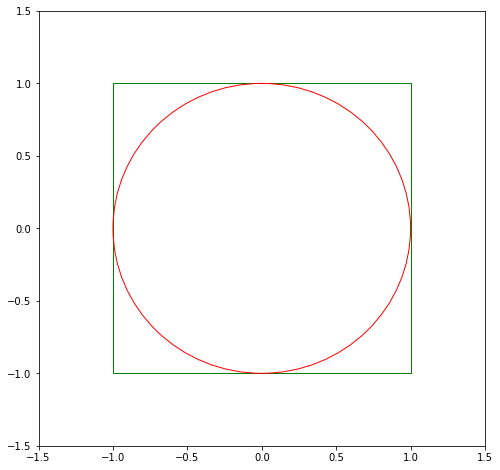

In [ ]:
from matplotlib.patches import Rectangle

circle1 = plt.Circle((0, 0), 1.0, color='r', fill = False)

fig, ax = plt.subplots(figsize=(8,8)) # note we must use plt.subplots, not plt.subplot
# (or if you have an existing figure)
# fig = plt.gcf()
# ax = fig.gca()

ax.add_artist(circle1)
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.add_patch( Rectangle((-1, -1),
                        2, 2,
                        fc ='none',
                        ec ='g',
                        lw = 1) )
plt.show()


In [ ]:
N = 10000
x = 2*np.random.random(N)-1
y = 2*np.random.random(N)-1

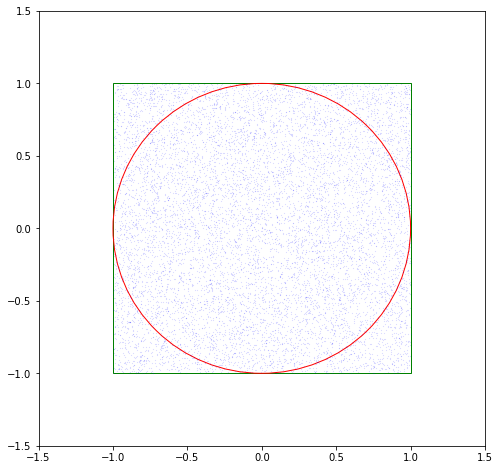

In [ ]:
circle1 = plt.Circle((0, 0), 1.0, color='r', fill = False)
fig, ax = plt.subplots(figsize=(8,8)) # note we must use plt.subplots, not plt.subplot
# (or if you have an existing figure)
# fig = plt.gcf()
# ax = fig.gca()

ax.add_artist(circle1)
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.add_patch( Rectangle((-1, -1),
                        2, 2,
                        fc ='none',
                        ec ='g',
                        lw = 1) )

ax.plot(x,y,"b.", markersize=0.1)

#ax.add_artist(circle2)
#ax.add_artist(circle3)


In [ ]:

def area(N):
  """
  Esta rutina calcula el area bajo la curva de un circulo
  """
  x = 2*np.random.random(N)-1
  y = 2*np.random.random(N)-1

  r=x**2+y**2
  tf = r<=1
  Np=len(r[tf])
  return 4*Np/N


In [ ]:
N = np.arange(10000, 10000000, 100000)
pi=np.zeros(len(N))
for i, n_ in enumerate(N):
 pi[i]=area(n_)

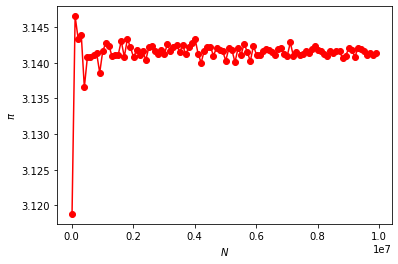

In [ ]:
plt.figure()
plt.plot(N, pi, "ro-" )
plt.ylabel("$\pi$")
plt.xlabel("$N$")

plt.show()

In [ ]:
f = lambda x: x**2
g = lambda x: np.sqrt(x)
h = lambda x: g(x)-f(x)

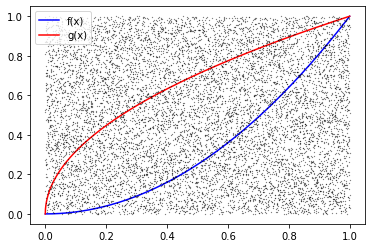

In [ ]:
N = 10000
dom_x = np.linspace(0, 1,N)
yr = np.random.random(N)

plt.plot(dom_x, f(dom_x), "b-", label="f(x)")
plt.plot(dom_x, g(dom_x),  "r-", label="g(x)")
plt.legend()
plt.plot(dom_x,yr,"k.",ms=0.4)

In [ ]:
N = 10000000
dom_x = np.linspace(0, 1,N)
yr = np.random.random(N)

Np1 = yr<=g(dom_x)
Np2 = yr>=f(dom_x)


In [ ]:
Npoints=len(yr[Np1&Np2])
print(Npoints)

3333515


In [ ]:
Npoints/N

0.3333515

In [ ]:
from scipy import integrate
a1=integrate.quad(g, 0, 1)
a2=integrate.quad(f, 0, 1)
print(a1[0]-a2[0])

0.3333333333333335


#Decaimiento radioactivo

Suponga que tiene una muestra con N nucleos radioacticos en el tiempo t. Suponga que las particulas pueden emitir radiacion y su población disminuir en un intervalo de tiempo $\Delta t$. Supongamos que la probablidad P por unidad de tiempo de una particula que presenta un decamiento es constante:


$P=\frac{\Delta N(t)/N(t)}{\Delta t} = -\lambda$

donde $-\lambda$ es la tasa de decaimiento



In [ ]:
import matplotlib.pylab as plt
import numpy as np

In [ ]:
def decaimiento(N):
  landa = 0.5
  t = 0
  N1 = []
  t1 = []

  t1.append(t)
  N1.append(N)

  while N > 0:
    DeltaN = 0
    for i in range(0, N):
      r_i = np.random.random()
      if(r_i < landa):
        DeltaN = DeltaN + 1
    t=t+1
    t1.append(t)
    N = N - DeltaN
    N1.append(N)

  N1=np.array(N1)
  t1=np.array(t1)
  return t1[0:-1], N1[0:-1]

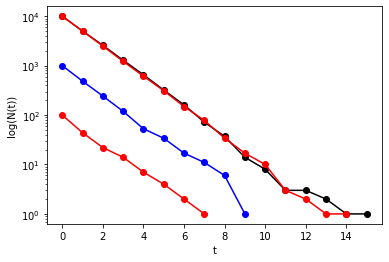

In [ ]:
t1, N1 = decaimiento(100)
t2, N2 = decaimiento(1000)
t3, N3 = decaimiento(10000)
t4, N4 = decaimiento(10000)


plt.plot(t1, N1, "ro-")
plt.plot(t2, N2, "bo-")
plt.plot(t3, N3, "ko-")
plt.plot(t4, N4, "ro-")
plt.yscale('log')
plt.xlabel("t")
plt.ylabel("log(N(t))")
plt.show()


# Error cuadratico medio

Minimizacion del error cuadratico medio:

\begin{equation}
\varepsilon^2 = \sum_i (mx_i+b -y_i)^2
\end{equation}


\begin{equation}
\varepsilon^2 = \sum_i (mx_i+b -y_i)^2
\end{equation}


al encontrar los parametros que minimizan la ecuación anterior, se puede encontrar que la pendiente m y en el intercepto b:



\begin{equation}
m = \frac{n\sum x_iy_i -\sum x_i \sum y_i}{n\sum x_i^2-
(\sum x_i)^2}
\end{equation}



\begin{equation}
b = \frac{n\sum y_i\sum x_i^2 -\sum x_i \sum x_iy_i}{n\sum x_i^2-(\sum x_i)^2}
\end{equation}

In [ ]:
# Realizar un fit con minimos cuadrados.

In [ ]:
n = len(t1)

xy = np.sum(t1*np.log(N1))
x2= np.sum(t1*t1)
x = np.sum(t1)
y = np.sum(np.log(N1))

m = (n*xy-x*y)/(n*x2-x*x)

print("La pendiente de la recta es", m)


La oendiente de la recta es -0.7069801635702975


In [ ]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


In [ ]:
def func(x, m, b):
    return m*x + b

popt, pcov = curve_fit(func, t1, np.log(N1))

In [ ]:
popt

array([-0.70698016,  4.63241768])

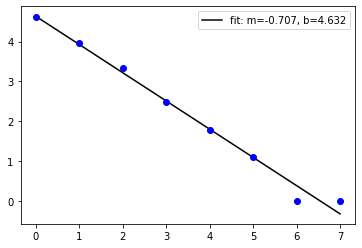

In [ ]:
plt.plot(t1, func(t1, *popt), 'k-', label='fit: m=%5.3f, b=%5.3f' % tuple(popt))
plt.plot(t1, np.log(N1), "bo")
plt.legend()
plt.show()